In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling as pdp
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [42]:
# LOAD DATA
INPUT_DIR  = '../../../input/lv2/'
LOG_NAME = '06_19_01_36_26'
data = pd.read_csv(INPUT_DIR + "sales_lv2.csv")
predicted = np.load(f"../log/{LOG_NAME}/pred_valid.npy")
json_load = json.load(open(f'../log/{LOG_NAME}/params.json', 'r'))

In [43]:
predicted.shape

(1, 28)

In [44]:
predicted

array([[0.35329992, 0.37344915, 0.30893075, 0.32859233, 0.7099533 ,
        0.8896728 , 0.8821225 , 0.47782516, 0.5701805 , 0.58140254,
        0.48719433, 0.68674433, 0.9465243 , 0.7735498 , 0.56323373,
        0.61750126, 0.42494544, 0.54079497, 0.71945435, 0.7903101 ,
        0.6749872 , 0.46569347, 0.4154086 , 0.43379623, 0.40112394,
        0.53643465, 0.6820333 , 0.6182954 ]], dtype=float32)

In [45]:
# InverseするためのScalerを作る
data = data.drop(['d_1062','d_1427','d_1792'],axis=1)
use_days = json_load['use_days']
state = json_load['state']
train_x = np.array(data[data['index']==state].iloc[:, -1 * (28*2 + use_days) : -28*2]).sum(axis=0).reshape(1,-1)
# train_x = np.array(data.iloc[:, -1 * (28*1 + use_days) : -28*1]).sum(axis=0).reshape(1,-1)
mm = MinMaxScaler(feature_range=(0.05, 0.95))
mm.fit(train_x.T)

MinMaxScaler(copy=True, feature_range=(0.05, 0.95))

In [46]:
# 予測値をInverse Transform
predicted = mm.inverse_transform(predicted)

In [47]:
days = 100
sells = np.array(data[data['index']==state].iloc[:, -1 * days : -28]).sum(axis=0)
sells.reshape(1,-1).shape

(1, 72)

In [48]:
np.concatenate([sells.reshape(1,-1),predicted],axis=1)

array([[17504.        , 15707.        , 14806.        , 12112.        ,
        12086.        , 11028.        , 12452.        , 16227.        ,
        14880.        , 10644.        ,  9906.        , 10283.        ,
        10606.        , 11406.        , 14766.        , 14382.        ,
        11064.        ,  9397.        , 13141.        , 14442.        ,
        13072.        , 17805.        , 17839.        , 11811.        ,
        11858.        , 12397.        , 11784.        , 13546.        ,
        17083.        , 16018.        , 13295.        , 13407.        ,
        11321.        , 10643.        , 12232.        , 15071.        ,
        14976.        , 10846.        , 10068.        ,  9304.        ,
         9470.        , 14682.        , 16481.        , 11728.        ,
        10256.        , 10216.        ,  9179.        ,  9774.        ,
        14762.        , 17406.        , 17797.        , 11728.        ,
        12821.        , 12989.        , 12057.        , 14740.  

WI


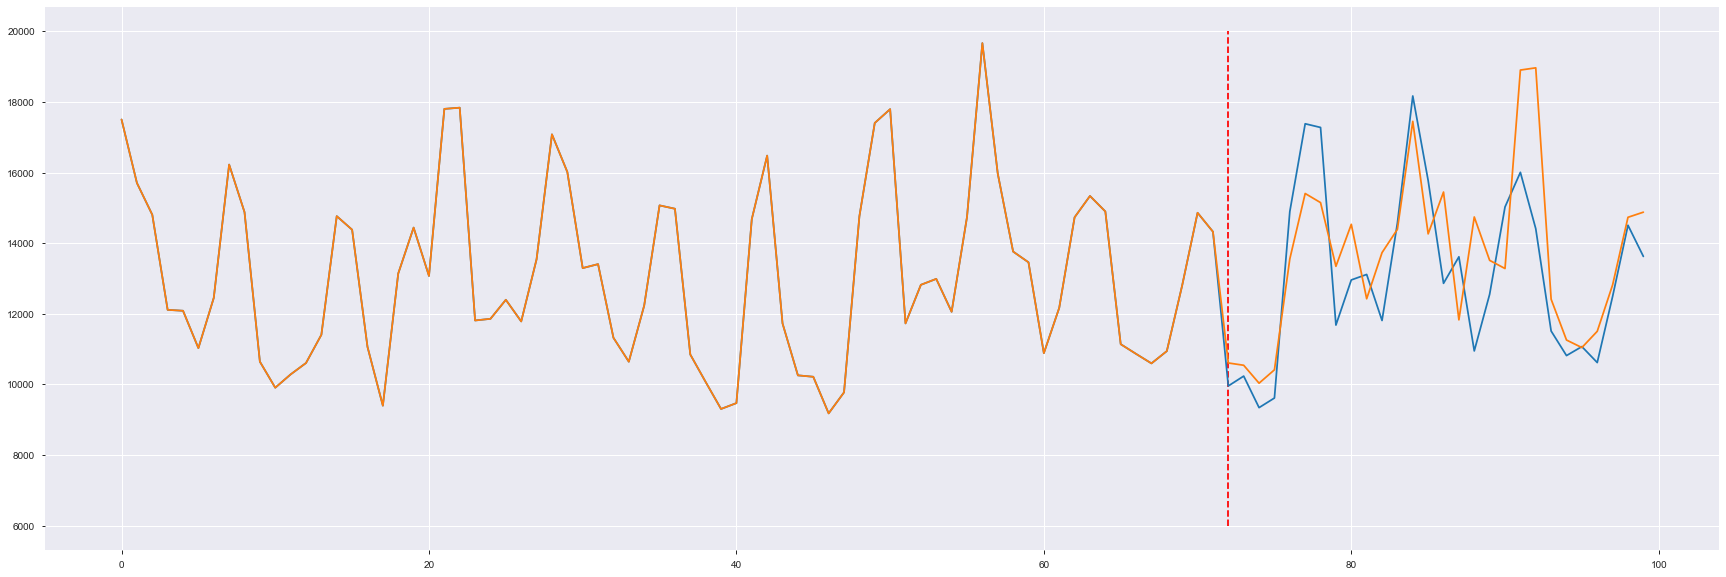

In [50]:
days = 100
f, ax = plt.subplots(figsize=(30, 10))
sells = np.array(data[data['index']==state].iloc[:, -1 * days : -28])
plt.plot(np.concatenate([sells.reshape(1,-1),predicted],axis=1).reshape(-1,))
plt.plot(np.array(data[data['index']==state].iloc[:, -1 * days :]).sum(axis=0))
# sns.lineplot(predicted.iloc[i, :].index, predicted.iloc[i,:].values.astype("float32"))
if state == 'CA':
    plt.vlines(days-28, 10000, 30000, "red", linestyles='dashed')
elif state == 'TX':
    plt.vlines(days-28, 6000, 20000, "red", linestyles='dashed')
else:
    plt.vlines(days-28, 6000, 20000, "red", linestyles='dashed')
print(state)